# BASELINE PREREQUISITES

### IMPORT LIBRARIES

In [1]:
import os
from tensorflow.keras.preprocessing.image import DirectoryIterator, ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from random import sample

### DEFINITIONS

#### GET DATA FROM TRAIN DATASET

def get_data(val_split = False, test_size = 0.3):
    '''This function returns the '''
    path = '../catchafish/data'
    batch_size = 100000
    
    dir_iterator = DirectoryIterator(directory = path, 
                                     image_data_generator = None, 
                                     target_size = (32, 32), 
                                     batch_size = batch_size,
                                     shuffle = True, 
                                     dtype = int)
    
    X = dir_iterator[0][0]
    y = dir_iterator.labels
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    
    if val_split:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3)
        return X_train, X_val, X_test, y_train, y_val, y_test
    else:
        return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_data()

#### GET DATA FROM TEST DATASET

In [10]:
def get_data_test(val_split = False, val_size = 0.3, zca_whitening = False):
    path = '../catchafish/data_test'
    batch_size = 1500
    dir_iterator = DirectoryIterator(directory = path,
                                     image_data_generator = None,
                                     target_size = (128, 128),
                                     batch_size = batch_size,
                                     shuffle = False,
                                     dtype = int)
    X = dir_iterator[0][0] / 255
    y = dir_iterator.labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    image_data_generator = ImageDataGenerator(zca_whitening = zca_whitening,
                                              rotation_range = 5,
                                              width_shift_range = 0.3,
                                              height_shift_range = 0.3,
                                              shear_range = 0.3,
                                              zoom_range = 0.3,
                                              horizontal_flip = True,
                                              fill_mode = 'nearest')
    if zca_whitening:
        image_data_generator.fit(X_train)

    extended_output = []
    for images in image_data_generator.flow(X_train, y_train, batch_size = batch_size):
        extended_output.append(images)
        if len(extended_output) == 5:
            break

    X_train = extended_output[0][0]
    y_train = extended_output[0][1]

    for data_tuple in extended_output[1:]:
        X_train = np.concatenate((X_train, data_tuple[0]), axis = 0)
        y_train = np.concatenate((y_train, data_tuple[1]), axis = 0)

    if val_split:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = val_size)
        return X_train, X_val, X_test, y_train, y_val, y_test
    else:
        return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = get_data_test()

Found 1305 images belonging to 11 classes.


In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4565, 128, 128, 3), (392, 128, 128, 3), (4565,), (392,))

#### MAPPING FISHES NAMES

In [49]:
def names_mapping(key):
    fishes = { 0 : ("fish_01", "Dascyllus reticulatus"),
             1 : ("fish_02", "Plectroglyphidodon dickii"),
             2 : ("fish_03", "Chromis chrysura"),
             3 : ("fish_04", "Amphiprion clarkii"),
             4 : ("fish_05", "Chaetodon lunulatus"),
             5 : ("fish_06", "Chaetodon trifascialis"),
             6 : ("fish_07", "Myripristis kuntee"),
             7 : ("fish_08", "Acanthurus nigrofuscus"),
             8 : ("fish_09", "Hemigymnus fasciatus"),
             9 : ("fish_10", "Neoniphon sammara"),
             10: ("fish_16", "Lutjanus fulvus")}
    if len(key) == 1:
        return fishes[key]
    else: return [fishes[k] for k in key]

In [50]:
fishs = names_mapping(y_test)
fishs

[('fish_04', 'Amphiprion clarkii'),
 ('fish_09', 'Hemigymnus fasciatus'),
 ('fish_01', 'Dascyllus reticulatus'),
 ('fish_02', 'Plectroglyphidodon dickii'),
 ('fish_01', 'Dascyllus reticulatus'),
 ('fish_01', 'Dascyllus reticulatus'),
 ('fish_01', 'Dascyllus reticulatus'),
 ('fish_01', 'Dascyllus reticulatus'),
 ('fish_01', 'Dascyllus reticulatus'),
 ('fish_07', 'Myripristis kuntee'),
 ('fish_02', 'Plectroglyphidodon dickii'),
 ('fish_03', 'Chromis chrysura'),
 ('fish_03', 'Chromis chrysura'),
 ('fish_02', 'Plectroglyphidodon dickii'),
 ('fish_01', 'Dascyllus reticulatus'),
 ('fish_01', 'Dascyllus reticulatus'),
 ('fish_02', 'Plectroglyphidodon dickii'),
 ('fish_01', 'Dascyllus reticulatus'),
 ('fish_01', 'Dascyllus reticulatus'),
 ('fish_07', 'Myripristis kuntee'),
 ('fish_04', 'Amphiprion clarkii'),
 ('fish_04', 'Amphiprion clarkii'),
 ('fish_04', 'Amphiprion clarkii'),
 ('fish_01', 'Dascyllus reticulatus'),
 ('fish_04', 'Amphiprion clarkii'),
 ('fish_01', 'Dascyllus reticulatus'),
 (

# RESHAPING DATAS

### TRAIN/TEST SPLIT FROM GET DATA

In [9]:
X_train, X_test, y_train, y_test = get_data()

NameError: name 'get_data' is not defined

In [60]:
X, y = get_data_test()

Found 253 images belonging to 10 classes.


In [53]:
X_test_2.shape, y_test_2.shape

((253, 32, 32, 3), (253,))

### CHECK SHAPES

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4565, 128, 128, 3), (4565,), (392, 128, 128, 3), (392,))

### RESHAPE X_TRAIN and X_TEST

In [16]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[1]*X_train.shape[3] )) # (32*32*3 = 3072)

In [56]:
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 3072))

In [57]:
X_test_2_reshaped = np.reshape(X_test_2, (X_test_2.shape[0], 3072))

# BASELINE MODEL

### MODEL INSTANCING

In [20]:
logreg = LogisticRegression( C  = 0.01, n_jobs=-1, multi_class='multinomial', solver='lbfgs')

### MODEL FITTING

In [21]:
logreg.fit(X_train_reshaped, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### SCORE THE MODEL

In [22]:
logreg.score(X_test_reshaped, y_test)

0.43735105982691586

In [23]:
logreg.score(X_test_2_reshaped, y_test_2)

0.06719367588932806

In [23]:
y_predict = logreg.predict(X_test_reshaped)

### GET THE MISCLASSIFIED PICTURES

In [39]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_predict):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index += 1

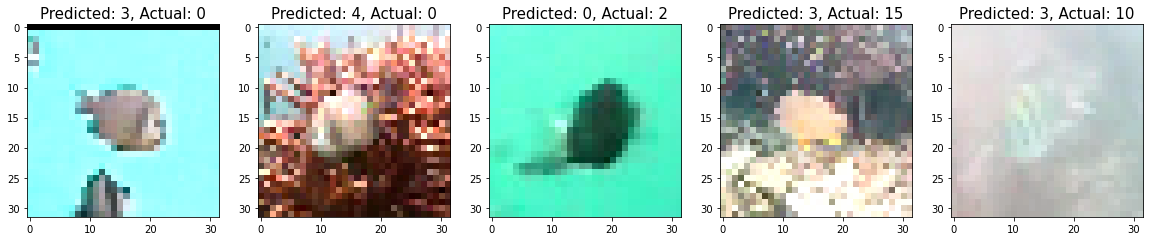

In [41]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test_reshaped[badIndex], (32,32,3)))
    plt.title('Predicted: {}, Actual: {}'.format(y_predict[badIndex], y_test[badIndex]), fontsize = 15)

# FIRST STEPS ML MODEL == SVC

### SCALING FOR SVC

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) 

In [71]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 3072))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 3072))

In [72]:
mmscaler = MinMaxScaler()

In [74]:
mmscaler.fit(X_train_reshaped)

c:\users\dany\.venvs\lewagon\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [75]:
X_train_scaled = mmscaler.transform(X_train_reshaped)

In [120]:
X_test_scaled = mmscaler.transform(X_test_reshaped)

### TRAINING SVC MODEL

In [18]:
from sklearn.model_selection import GridSearchCV

In [26]:
svc_model = SVC(gamma='scale', kernel='rbf')

In [27]:
svc_model.fit(X_train_reshaped, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[1]*X_train.shape[3] ))

In [29]:
svc_model.score(X_test_reshaped, y_test)

0.40816326530612246

In [16]:
#param_grid = { "C" : [1,10,15], "kernel" : ["linear", "rbf", "poly", "sigmoid"]}

In [24]:
#svcgrid = GridSearchCV(estimator = svc_model,
                       #param_grid = param_grid,
                      #cv = 5,
                      #n_jobs = -1,
                      #scoring = 'accuracy')

In [ ]:
svcgrid.fit(X_train_reshaped, y_train)

In [137]:
svcgrid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [138]:
svcgrid.best_score_

0.4576271186440678

In [139]:
best_svc = svcgrid.best_estimator_

In [140]:
best_svc.score(X_test_scaled, y_test)

0.3815789473684211

In [141]:
from sklearn.metrics import classification_report

In [143]:
y_pred = best_svc.predict(X_test_scaled)

In [155]:
fishnames = ["Dascyllus reticulatus",
             "Plectroglyphidodon dickii",
             "Chromis chrysura",
             "Amphiprion clarkii",
             "Chaetodon lunulatus",
             #"Chaetodon trifascialis",
             "Myripristis kuntee",
             "Acanthurus nigrofuscus",
             "Hemigymnus fasciatus",
             "Neoniphon sammara",
             "Lutjanus fulvus", 
             "Scolopsis bilineata"]

In [156]:
svc_report = classification_report(y_test, y_pred, target_names = fishnames)

In [157]:
print(svc_report)

                           precision    recall  f1-score   support

    Dascyllus reticulatus       0.17      0.17      0.17         6
Plectroglyphidodon dickii       0.00      0.00      0.00        10
         Chromis chrysura       0.44      0.80      0.57         5
       Amphiprion clarkii       0.60      0.60      0.60         5
      Chaetodon lunulatus       0.40      0.57      0.47         7
       Myripristis kuntee       0.21      0.43      0.29         7
   Acanthurus nigrofuscus       0.21      0.43      0.29         7
     Hemigymnus fasciatus       0.88      0.54      0.67        13
        Neoniphon sammara       0.33      0.12      0.18         8
          Lutjanus fulvus       0.60      0.38      0.46         8

                micro avg       0.38      0.38      0.38        76
                macro avg       0.38      0.40      0.37        76
             weighted avg       0.41      0.38      0.37        76



### MISSCLASSIFIED PICTURES  OF FISH CATEGORIE 1

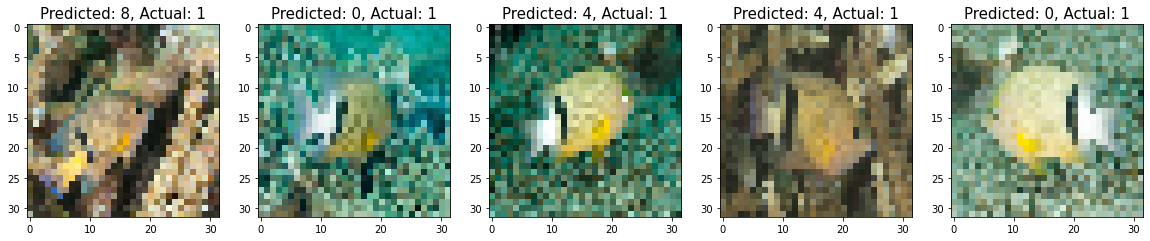

In [179]:
indexes = [i for i, y in enumerate(y_test) if y == 1]
missclassified_cat1 = [ y_pred[ind] for ind in indexes ]
plt.figure(figsize=(20, 4))
for i, j  in enumerate(indexes[5:10]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.reshape(X_test_reshaped[j], (32,32,3)))
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[j], y_test[j]), fontsize = 15)

# SGD CLASSIFIER

In [30]:
sgd_model = SGDClassifier(max_iter=1000)

In [212]:
sgd_param_grid = {"loss": ["hinge","log"], "penalty" : ["l2", "l1", "elasticnet"], "alpha" : [0.01, 0.001, 0.0001] }

In [213]:
sgd_gridsearch = GridSearchCV(estimator = sgd_model,
                              param_grid = sgd_param_grid, cv = 10,
                              n_jobs = -1,
                              scoring = 'accuracy',
                              verbose = True)

In [214]:
sgd_gridsearch.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  9.9min finished
c:\users\dany\.venvs\lewagon\lib\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\dany\.venvs\lewagon\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'loss': ['hinge', 'log'], 'penalty': ['l2', 'l1', 'elasticnet'], 'alpha': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

In [215]:
sgd_gridsearch.best_score_

0.4971751412429379

In [218]:
sgd_gridsearch.best_estimator_

SGDClassifier(alpha=0.01, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [216]:
sgd_best = sgd_gridsearch.best_estimator_

In [217]:
sgd_best.score(X_test_scaled, y_test)

0.35526315789473684

# SET UP CUSTOM METRIC

# KNN CLASSIFIER

In [ ]:
from sklean.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_jobs=-1)

In [ ]:
knn_param_grid = {"n_neighbors" : [2, 5, 10, 15],
                  "p" : [1, 2], 
                  "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]}

In [ ]:
knn_gridsearch = GridSearchCV(estimator = knn_model,
                              param_grid = knn_param_grid, cv = 5,
                              n_jobs = -1,
                              scoring = 'accuracy',
                              verbose = 1)

In [ ]:
knn_report = classification_report(y_test, y_pred, target_names = fishnames)

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc_model = RandomForestClassifier(n_jobs=-1)

In [ ]:
rfc_param_grid = {"n_estimators": [100, 150, 250],
                  "max_depth": [2, 3, 4, 7],
                  "min_samples_split" : [2, 5, 10, 15]}

In [ ]:
rfc_gridsearch = GridSearchCV(estimator = rfc_model,
                              param_grid = rfc_param_grid, cv = 5,
                              n_jobs = -1,
                              scoring = 'accuracy',
                              verbose = 1)

In [ ]:
rfc_report = classification_report(y_test, y_pred, target_names = fishnames)